In [1]:
import matplotlib.pyplot as plt

from ALLCools.clustering import tsne
from ALLCools.plot import *
from ALLCools.integration import SeuratIntegration
from wmb import brain

import scanpy as sc
import anndata
from harmonypy import run_harmony

CEMBA_SNM3C_3C_CHROM100K_RAW_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/CEMBA_3C/mcds/CEMBA.snm3C.chrom100k_raw.zarr
CEMBA_SNM3C_3C_COMPARTMENT_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/CEMBA_3C/mcds/CEMBA.snm3C.3C.mcds/chrom100k
CEMBA_SNM3C_3C_DOMAIN_INSULATION_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/CEMBA_3C/mcds/CEMBA.snm3C.3C.mcds/chrom25k
CEMBA_SNM3C_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/CEMBA.snm3C
CEMBA_SNMC_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/CEMBA.snmC
AIBS_SMART_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/AIBS.SMART
AIBS_TENX_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/AIBS.TENX
BROAD_TENX_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/BROAD.TENX


## Parameters

In [2]:
dataset = 'AIBS_SMART'

In [3]:
ref_region_type = 'CEMBA'
query_region_type = dataset

## Load

In [4]:
adata_merge = anndata.read_h5ad('final.h5ad')
adata_merge

AnnData object with n_obs × n_vars = 162632 × 483
    obs: 'count', 'read_count', 'n_counts', 'leiden', 'Modality', 'L1_annot', 'L2', 'L3', 'DissectionRegion', 'L1_annot_transfer', 'L2_transfer', 'L3_transfer', 'DissectionRegion_transfer'
    var: 'mean-RNA', 'std-RNA'
    obsm: 'X_pca_integrate'

## Harmony for embedding

In [5]:
ho = run_harmony(data_mat=adata_merge.obsm['X_pca_integrate'],
                 meta_data=adata_merge.obs,
                 nclust=50,
                 vars_use=['Modality'], 
                 max_iter_harmony=30)

2022-08-10 05:31:19,994 - harmonypy - INFO - Iteration 1 of 30
2022-08-10 05:31:38,561 - harmonypy - INFO - Iteration 2 of 30
2022-08-10 05:32:01,977 - harmonypy - INFO - Converged after 2 iterations


In [6]:
adata_merge.obsm['X_harmony'] = ho.Z_corr.T

### TSNE

In [12]:
tsne(adata_merge, obsm='X_harmony')

### UMAP

In [13]:
adata_merge.obsm['X_pca'] = adata_merge.obsm['X_harmony']

sc.pp.neighbors(adata_merge)

In [14]:
min_dist = max(0.1, 1 - adata_merge.shape[0] / 60000)
sc.tl.umap(adata_merge, min_dist=min_dist)
del adata_merge.obsm['X_pca']

### Clustering

In [15]:
sc.tl.leiden(adata_merge, resolution=0.3)

## Plot

In [30]:
adata_merge

AnnData object with n_obs × n_vars = 162632 × 483
    obs: 'count', 'read_count', 'n_counts', 'leiden', 'Modality', 'L1_annot', 'L2', 'L3', 'DissectionRegion', 'L1_annot_transfer', 'L2_transfer', 'L3_transfer', 'DissectionRegion_transfer'
    var: 'mean-RNA', 'std-RNA'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca_integrate', 'X_harmony', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'

[Text(0.5, 1.0, 'merfish L1 transferred annot')]

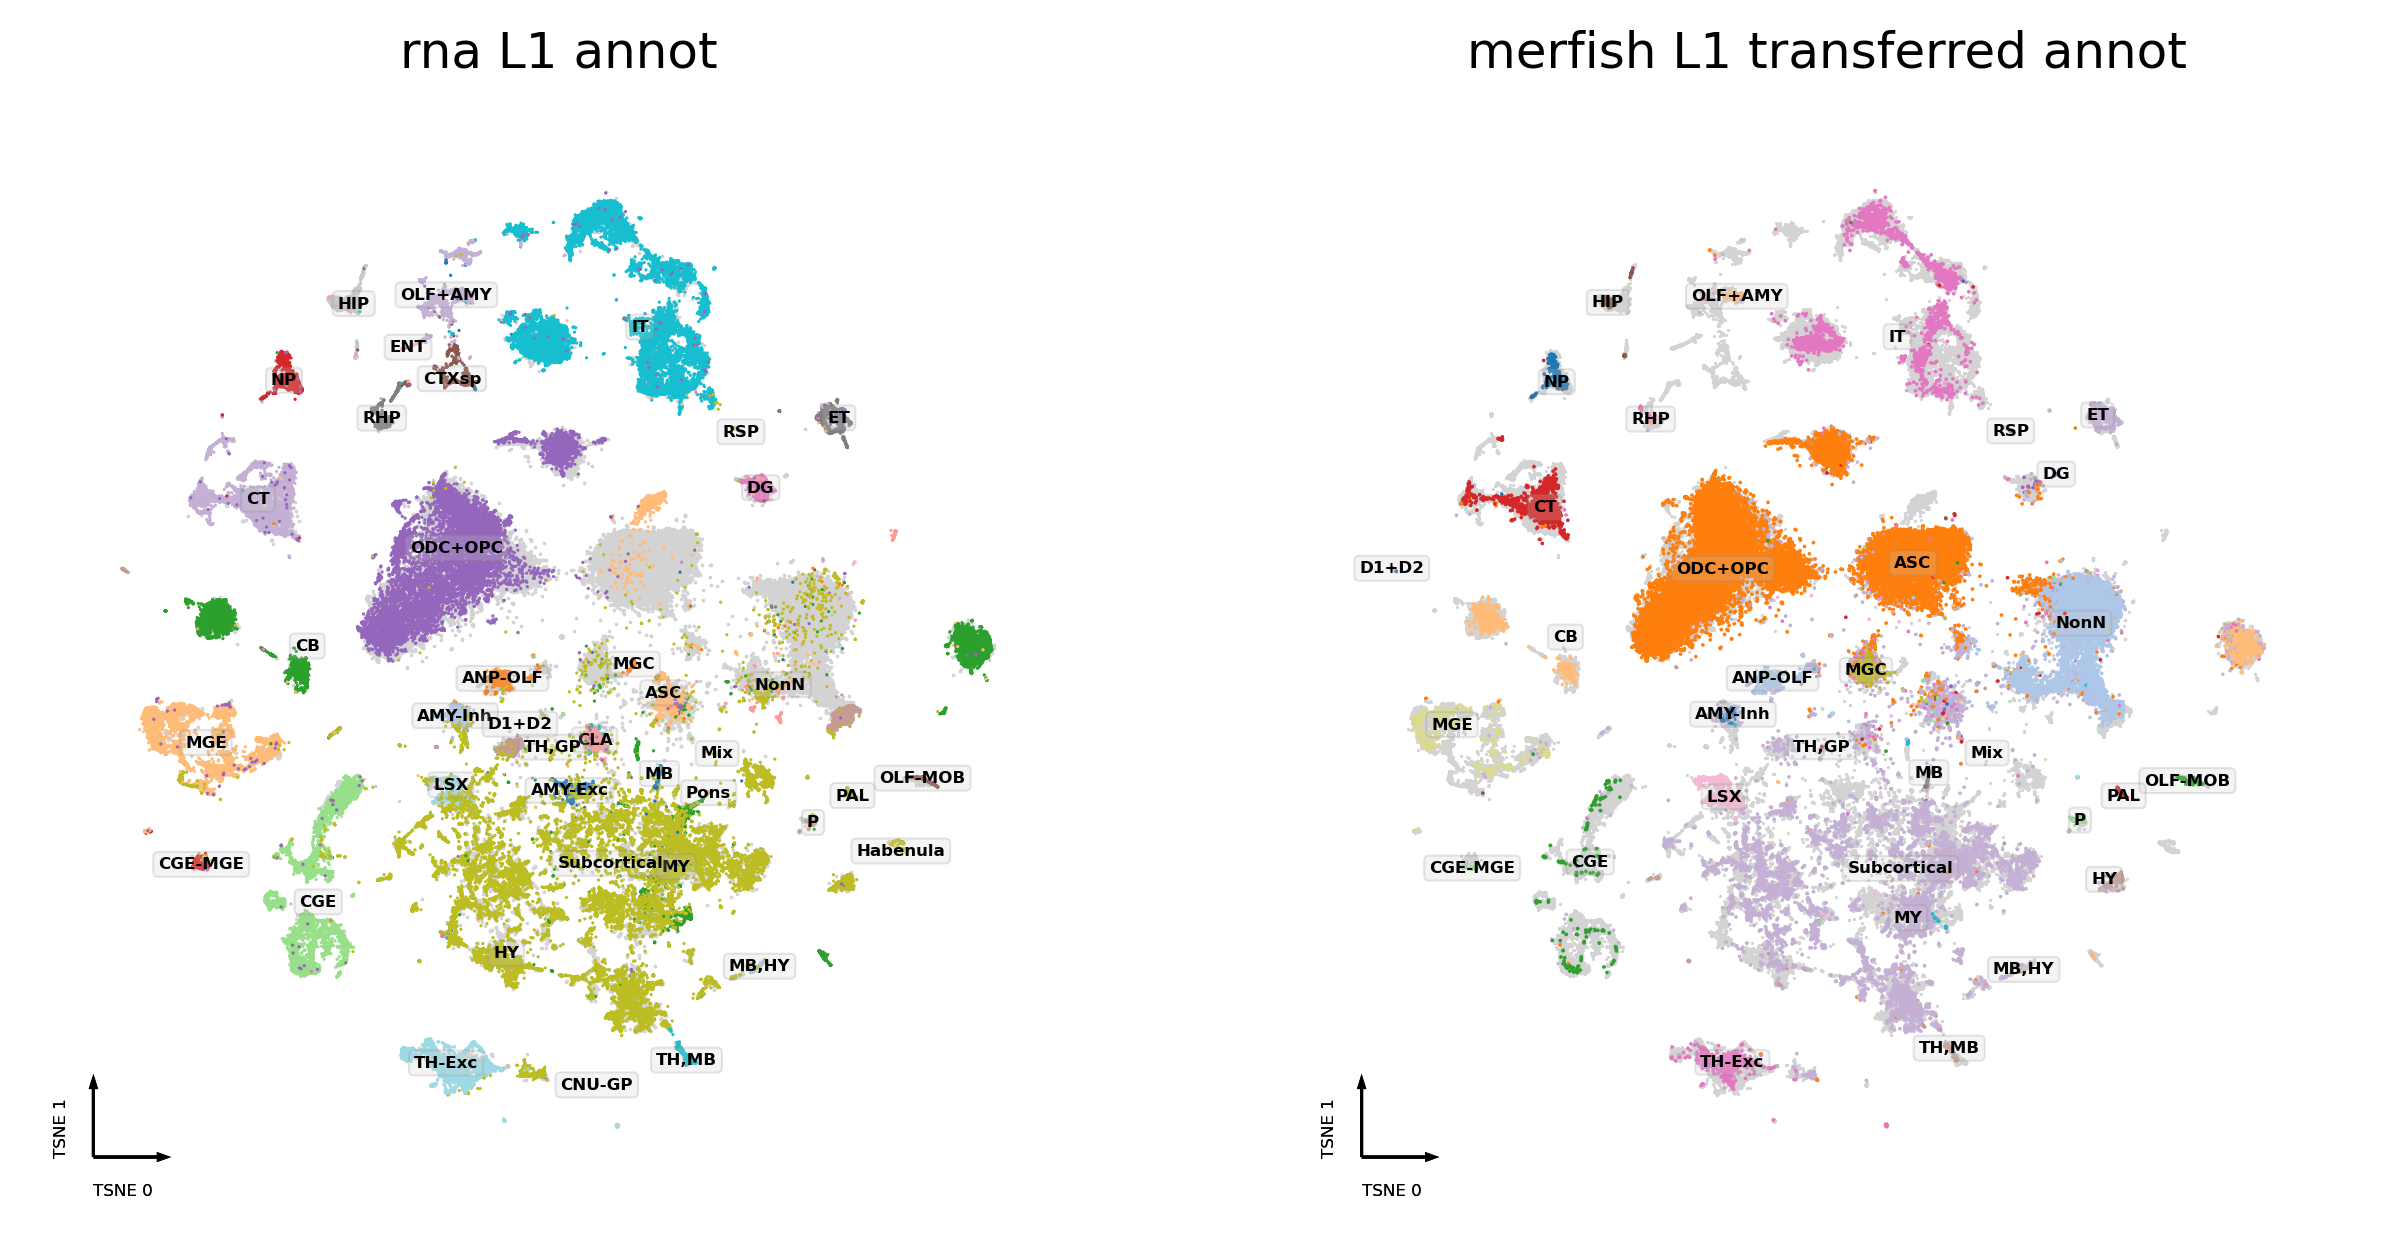

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5),dpi=300)

merfish_adata = adata_merge[adata_merge.obs['Modality'] == 'merfish']
rna_adata = adata_merge[adata_merge.obs['Modality'] == 'RNA']

ax = axes[0]
categorical_scatter(data=merfish_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=rna_adata,
    ax=ax,
    coord_base='tsne',
    hue='L1_annot',
    text_anno='L1_annot',
    palette='tab20',
    max_points=None,)

ax.set(title = 'rna L1 annot')

    
    
ax = axes[1]
categorical_scatter(data=rna_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=merfish_adata,
    ax=ax,
    coord_base='tsne',
    hue='L1_annot_transfer',
    text_anno='L1_annot_transfer',
    palette='tab20',
    max_points=None,
)
ax.set(title = 'merfish L1 transferred annot')


In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5, 5),dpi=300)

continuous_scatter(
    data=adata_merge,
    ax=ax,
    coord_base='tsne',
    hue='L1_annot',
    max_points=None,)

In [61]:
adata_merge.obs

count  read_count  n_counts leiden Modality L1_annot  \
SM-GE4RR_S339_E1-50   8070.0    626881.0   23087.0      1      RNA  AMY-Exc   
SM-GE5NY_S003_E1-50  10279.0    573388.0   19625.0      1      RNA  AMY-Exc   
SM-GE5NY_S121_E1-50   9587.0    586259.0   22210.0      1      RNA  AMY-Exc   
SM-GE5NY_S195_E1-50  10946.0    428944.0   21171.0      1      RNA  AMY-Exc   
SM-GE5NY_S196_E1-50   9312.0    517537.0   19250.0      1      RNA  AMY-Exc   
...                      ...         ...       ...    ...      ...      ...   
9_90                     NaN         NaN       NaN      5  merfish      NaN   
9_94                     NaN         NaN       NaN      0  merfish      NaN   
9_95                     NaN         NaN       NaN      0  merfish      NaN   
9_96                     NaN         NaN       NaN      0  merfish      NaN   
9_99                     NaN         NaN       NaN      0  merfish      NaN   

                       L2      L3     DissectionRegion L1_annot_transfer  \
SM-GE4RR_S339_E1-50  40_9  40_9_3  OLF_COA_PAA_NLOT_TR           AMY-Exc   
SM-GE5NY_S003_E1-50  40_3  40_3_2  OLF_COA_PAA_NLOT_TR           AMY-Exc   
SM-GE5NY_S121_E1-50  40_2  40_2_2  OLF_COA_PAA_NLOT_TR           AMY-Exc   
SM-GE5NY_S195_E1-50  40_3  40_3_1  OLF_COA_PAA_NLOT_TR           AMY-Exc   
SM-GE5NY_S196_E1-50  40_9  40_9_1  OLF_COA_PAA_NLOT_TR           AMY-Exc   
...                   ...     ...                  ...               ...   
9_90                  NaN     NaN                  NaN               ASC   
9_94                  NaN     NaN                  NaN           ODC+OPC   
9_95                  NaN     NaN                  NaN           ODC+OPC   
9_96                  NaN     NaN                  NaN           ODC+OPC   
9_99                  NaN     NaN                  NaN           ODC+OPC   

                    L2_transfer L3_transfer DissectionRegion_transfer  
SM-GE4RR_S339_E1-50        40_9      40_9_3       OLF_COA_PAA_NLOT_TR  
SM-GE5NY_S003_E1-50        40_3      40_3_2       OLF_COA_PAA_NLOT_TR  
SM-GE5NY_S121_E1-50        40_2      40_2_2       OLF_COA_PAA_NLOT_TR  
SM-GE5NY_S195_E1-50        40_3      40_3_1       OLF_COA_PAA_NLOT_TR  
SM-GE5NY_S196_E1-50        40_9      40_9_1       OLF_COA_PAA_NLOT_TR  
...                         ...         ...                       ...  
9_90                       37_3      73_0_0              MY_LRN_PGRNl  
9_94                       19_7      19_7_1          MY_CU_GR_ECU_PAS  
9_95                       19_6      19_7_1                    MY_IRN  
9_96                       19_7      19_7_1            PAL_MS_NDB_TRS  
9_99                       19_6     19_10_3                    MY_IRN  

[162632 rows x 13 columns]

In [11]:
def plot(coord_base):
    fig, axes = plt.subplots(nrows=2,
                             ncols=3,
                             figsize=(12, 8),
                             dpi=300,
                             constrained_layout=True)

    mc_data = adata_merge[adata_merge.obs['Modality'] == 'mC']
    rna_data = adata_merge[adata_merge.obs['Modality'] == 'RNA']

    ax = axes[0, 0]
    categorical_scatter(data=rna_data,
                        coord_base=coord_base,
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)
    categorical_scatter(
        data=mc_data,
        ax=ax,
        coord_base=coord_base,
        hue='leiden',
        text_anno='leiden',
        palette='tab20',
        max_points=None,
    )

    ax = axes[0, 1]
    categorical_scatter(data=rna_data,
                        coord_base=coord_base,
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)
    categorical_scatter(
        data=mc_data,
        ax=ax,
        coord_base=coord_base,
        hue=f'{plot_key}',
        # text_anno='L2',
        palette='tab20',
        max_points=None,
    )

    ax = axes[0, 2]
    categorical_scatter(data=rna_data,
                        coord_base=coord_base,
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)
    region_palette_1 = brain.get_dissection_region_palette(ref_region_type)
    categorical_scatter(
        data=mc_data,
        ax=ax,
        coord_base=coord_base,
        hue='DissectionRegion',
        palette=region_palette_1,
    )

    ax = axes[1, 0]
    categorical_scatter(data=mc_data,
                        coord_base=coord_base,
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)
    categorical_scatter(
        data=rna_data,
        ax=ax,
        coord_base=coord_base,
        hue='leiden',
        text_anno='leiden',
        palette='tab20',
        max_points=None,
    )

    ax = axes[1, 1]
    categorical_scatter(data=mc_data,
                        coord_base=coord_base,
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)
    categorical_scatter(
        data=rna_data,
        ax=ax,
        coord_base=coord_base,
        hue=f'{plot_key}_transfer',
        # text_anno='L2_transfer',
        palette='tab20',
        max_points=None,
    )

    ax = axes[1, 2]
    categorical_scatter(data=mc_data,
                        coord_base=coord_base,
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)
    region_palette_2 = brain.get_dissection_region_palette(query_region_type)
    categorical_scatter(
        data=rna_data,
        ax=ax,
        coord_base=coord_base,
        hue='DissectionRegion',
        palette=region_palette_2,
    )

    for i, xx in enumerate([
            'Ref Co-cluster', 'Ref CellType', 'Ref Region',
            'Query Co-cluster', 'Query CellType Transfer', 'Query Region'
    ]):
        axes.flatten()[i].set_title(xx, fontsize=15)
    return

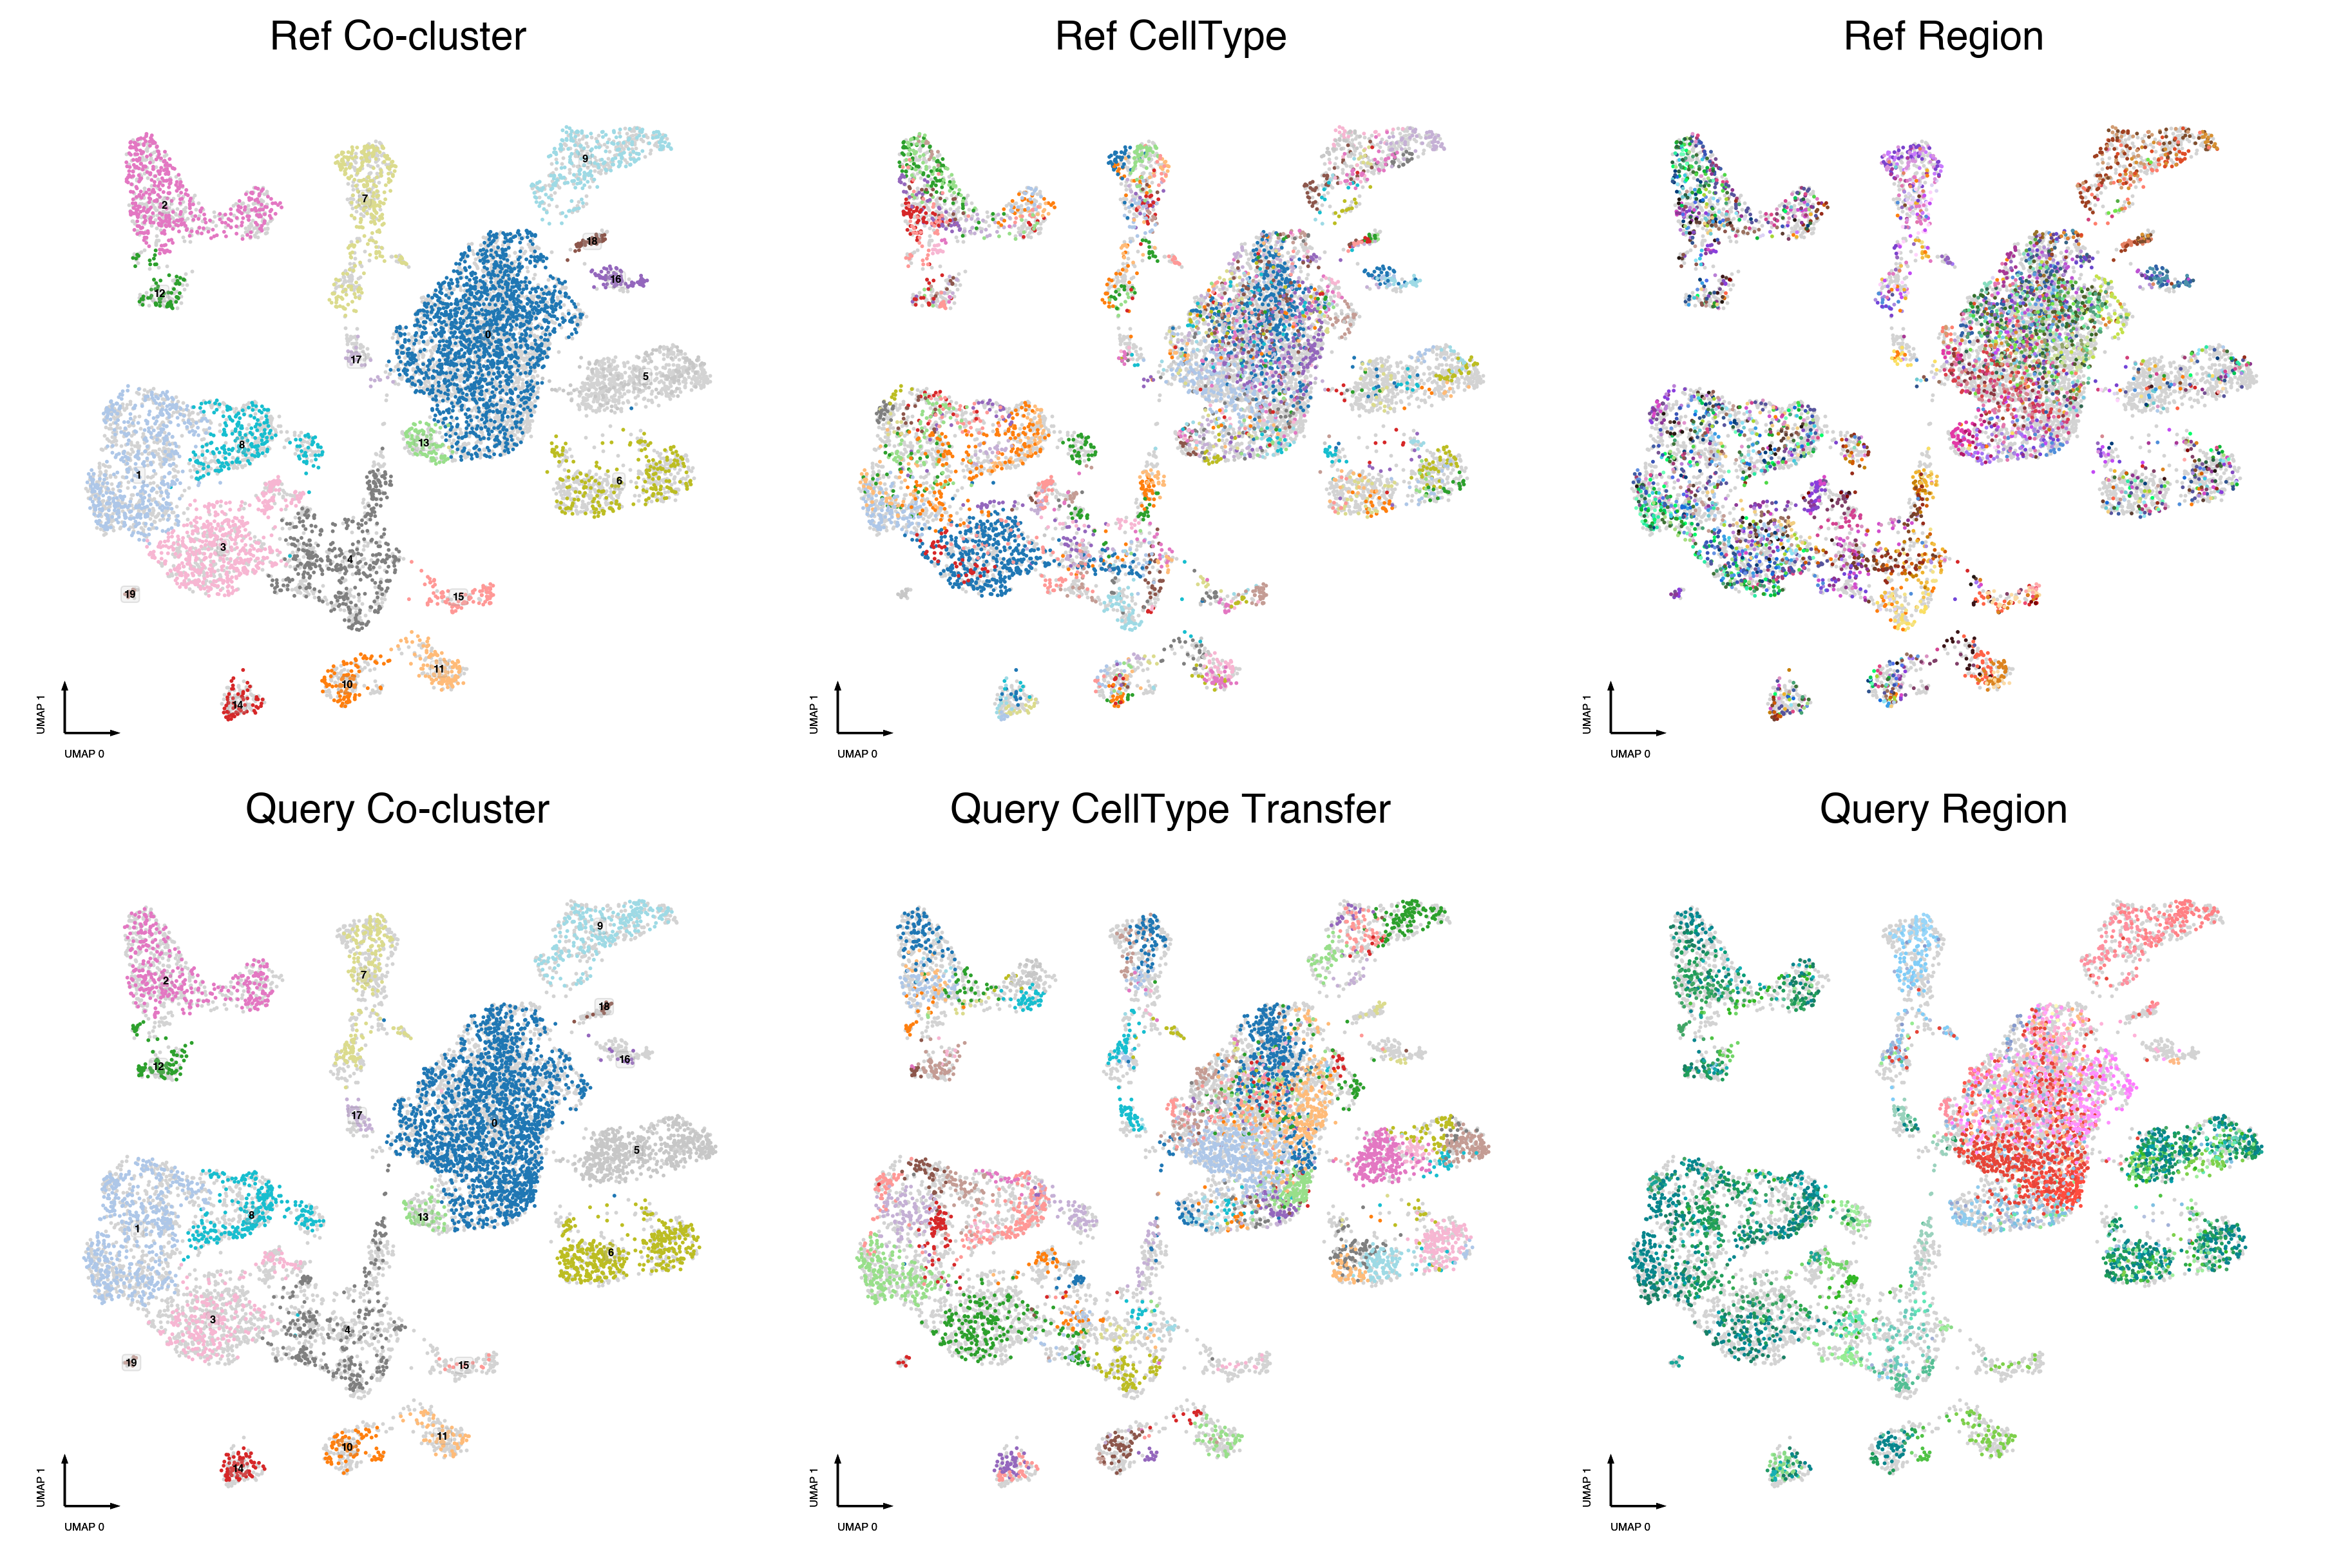

In [12]:
plot('umap')

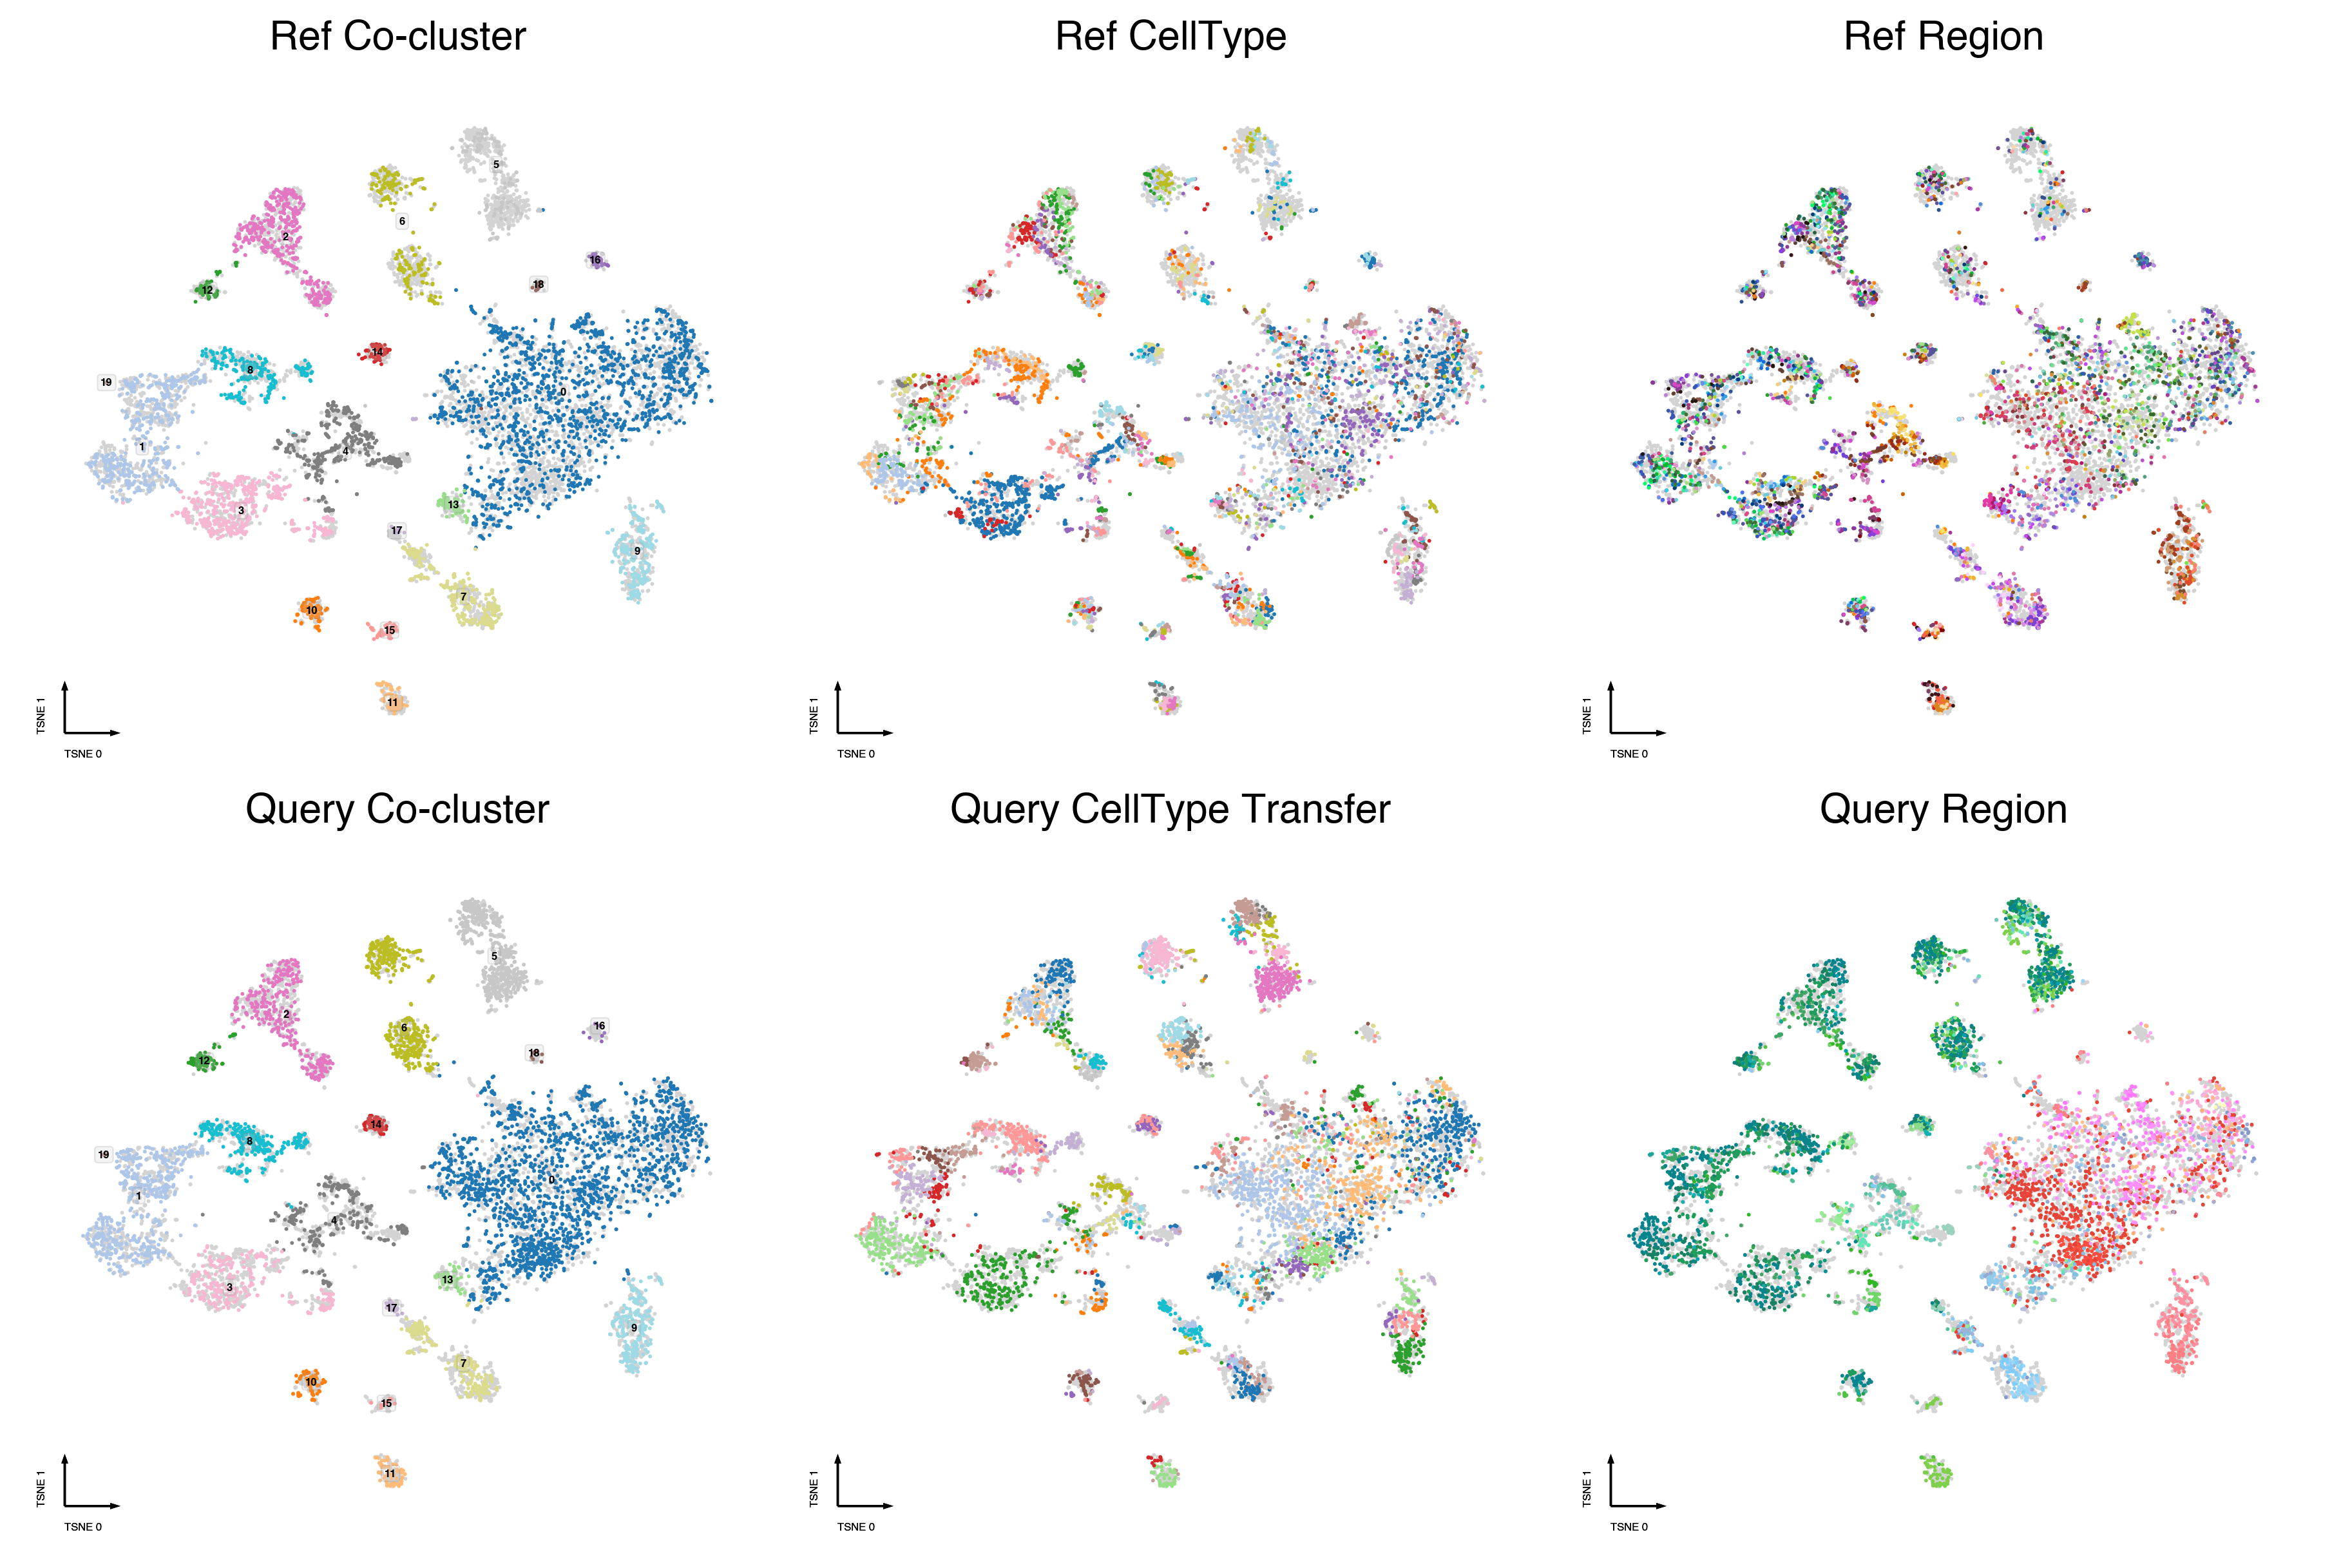

In [13]:
plot('tsne')

## Save

In [63]:
adata_merge.write_h5ad('final_with_coords.h5ad')

In [16]:
adata_merge

AnnData object with n_obs × n_vars = 10000 × 3318
    obs: 'count', 'read_count', 'n_counts', 'Modality', 'DissectionRegion', 'L1_annot', 'L2', 'L1_annot_transfer', 'L2_transfer', 'DissectionRegion_transfer', 'leiden'
    var: 'chrom', 'end-RNA', 'start-RNA', 'mean-RNA', 'std-RNA', 'cov_mean-mC', 'end-mC', 'start-mC'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca_integrate', 'X_harmony', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'

In [62]:
adata_merge

AnnData object with n_obs × n_vars = 162632 × 483
    obs: 'count', 'read_count', 'n_counts', 'leiden', 'Modality', 'L1_annot', 'L2', 'L3', 'DissectionRegion', 'L1_annot_transfer', 'L2_transfer', 'L3_transfer', 'DissectionRegion_transfer'
    var: 'mean-RNA', 'std-RNA'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca_integrate', 'X_harmony', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'